## Data Cleaning

In this notebook we will go through the process of cleaning the data obtained from ratebeer.com. We will look at the different columns, figure out strategies to impute missing data, drop unwanted columns and add columns as needed. 

## Import Modules

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

We have already acquired the data from ratebeer.com and saved the data as a .csv file. Details on data acquistion are provided in the notebook here.

In [92]:
df = pd.read_csv('RateBeer.csv')

In [93]:
df.head()

,Unnamed: 0,beer_id,beer_name,beer_description,beer_abv,beer_styleScore,beer_overallScore,beer_averageRating,beer_ratingCount,beer_styleName,brewery_name,brewery_type,brewery_street,brewery_city,brewery_state,brewery_country,brewery_continent,brewery_twitter,brewery_facebook
0,1,58057,Närke Kaggen Stormaktsporter,Imperial Stout brewed with heather honey and a...,9.5,100.0,100.0,4.489771,557,Imperial Stout,Närke Kulturbryggeri,Microbrewery,Beväringsgatan 2,Örebro,NaN,Sweden,NaN,NaN,NaN
1,2,4934,Westvleteren 12 (XII),Westvleteren has the smallest output of the Tr...,10.2,100.0,100.0,4.426578,3332,Abt/Quadrupel,Westvleteren Abdij St. Sixtus,Microbrewery,Donkerstraat 12,Westvleteren,NaN,Belgium,NaN,NaN,NaN
2,3,231441,Schramm’s The Heart of Darkness,The Heart of Darkness is our capstone mead. It...,14.0,100.0,100.0,4.423655,77,Mead,Schramm’s Mead,Meadery,327 West 9 Mile Road,Ferndale,Michigan,United States,North America,schrammsmead,https://facebook.com/SchrammsMeadery
3,4,106749,B. Nektar Ken Schramm Signature Series - The H...,Meadmaker Ken Schramm crafted the Heart of Dar...,14.0,100.0,100.0,4.421873,50,Mead,B. Nektar Meadery,Meadery,1511 Jarvis,Ferndale,Michigan,United States,North America,bnektar,https://facebook.com/b.nektar
4,5,140581,Cigar City Pilot Series Dragonfruit Passion Fr...,Editor’s Note: This is an archived entry for t...,0.0,100.0,100.0,4.420719,46,Berliner Weisse,Cigar City Brewing,Microbrewery,3924 W Spruce Street,Tampa,Florida,United States,North America,cigarcitybeer,https://facebook.com/cigarcitybeer


In [94]:
#drop the unnamed column
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [95]:
df.head()

,beer_id,beer_name,beer_description,beer_abv,beer_styleScore,beer_overallScore,beer_averageRating,beer_ratingCount,beer_styleName,brewery_name,brewery_type,brewery_street,brewery_city,brewery_state,brewery_country,brewery_continent,brewery_twitter,brewery_facebook
0,58057,Närke Kaggen Stormaktsporter,Imperial Stout brewed with heather honey and a...,9.5,100.0,100.0,4.489771,557,Imperial Stout,Närke Kulturbryggeri,Microbrewery,Beväringsgatan 2,Örebro,NaN,Sweden,NaN,NaN,NaN
1,4934,Westvleteren 12 (XII),Westvleteren has the smallest output of the Tr...,10.2,100.0,100.0,4.426578,3332,Abt/Quadrupel,Westvleteren Abdij St. Sixtus,Microbrewery,Donkerstraat 12,Westvleteren,NaN,Belgium,NaN,NaN,NaN
2,231441,Schramm’s The Heart of Darkness,The Heart of Darkness is our capstone mead. It...,14.0,100.0,100.0,4.423655,77,Mead,Schramm’s Mead,Meadery,327 West 9 Mile Road,Ferndale,Michigan,United States,North America,schrammsmead,https://facebook.com/SchrammsMeadery
3,106749,B. Nektar Ken Schramm Signature Series - The H...,Meadmaker Ken Schramm crafted the Heart of Dar...,14.0,100.0,100.0,4.421873,50,Mead,B. Nektar Meadery,Meadery,1511 Jarvis,Ferndale,Michigan,United States,North America,bnektar,https://facebook.com/b.nektar
4,140581,Cigar City Pilot Series Dragonfruit Passion Fr...,Editor’s Note: This is an archived entry for t...,0.0,100.0,100.0,4.420719,46,Berliner Weisse,Cigar City Brewing,Microbrewery,3924 W Spruce Street,Tampa,Florida,United States,North America,cigarcitybeer,https://facebook.com/cigarcitybeer


In [96]:
df.shape

(220000, 18)

The data set contains 220,000 beers with 18 variables. There are 5 columns that are numerical and will be important for the analysis. The 'beer_description' column will be interesting to look at from a sentiment analysis perspective. However, it will not be applied for this project. Other columns such as brewery_name, brewery_street, brewery_city can be dropped from the data frame since they add no value for the current analysis. The brewery_country column will be useful to look at the variation in beer ratings across countries i.e. to answer the question which country produces the best beer? The brewery_continent column is to broad for an analysis and is expected not to give any insights. The last two columns give the links to the beer/brewery social media accounts. These will be converted to binary columns for analysis to analyze the effect of social media on the ratings and other variables.

In [97]:
# drop unwanted columns from the dataframe
cols = ['beer_name','beer_abv','beer_styleScore','beer_overallScore','beer_averageRating','beer_ratingCount','beer_styleName','brewery_type','brewery_state','brewery_country','brewery_twitter','brewery_facebook']
df = df.loc[:,cols]

In [98]:
df.head()

,beer_name,beer_abv,beer_styleScore,beer_overallScore,beer_averageRating,beer_ratingCount,beer_styleName,brewery_type,brewery_state,brewery_country,brewery_twitter,brewery_facebook
0,Närke Kaggen Stormaktsporter,9.5,100.0,100.0,4.489771,557,Imperial Stout,Microbrewery,NaN,Sweden,NaN,NaN
1,Westvleteren 12 (XII),10.2,100.0,100.0,4.426578,3332,Abt/Quadrupel,Microbrewery,NaN,Belgium,NaN,NaN
2,Schramm’s The Heart of Darkness,14.0,100.0,100.0,4.423655,77,Mead,Meadery,Michigan,United States,schrammsmead,https://facebook.com/SchrammsMeadery
3,B. Nektar Ken Schramm Signature Series - The H...,14.0,100.0,100.0,4.421873,50,Mead,Meadery,Michigan,United States,bnektar,https://facebook.com/b.nektar
4,Cigar City Pilot Series Dragonfruit Passion Fr...,0.0,100.0,100.0,4.420719,46,Berliner Weisse,Microbrewery,Florida,United States,cigarcitybeer,https://facebook.com/cigarcitybeer


Now that we have only the required columns in the dataframe, we will give easily readable names to the columns.

In [99]:
df.columns = ['Name','ABV','StyleScore','OverallScore','AverageRating','RatingCount','BeerStyle','BreweryType','State','Country','Twitter','Facebook']
df.head()

,Name,ABV,StyleScore,OverallScore,AverageRating,RatingCount,BeerStyle,BreweryType,State,Country,Twitter,Facebook
0,Närke Kaggen Stormaktsporter,9.5,100.0,100.0,4.489771,557,Imperial Stout,Microbrewery,NaN,Sweden,NaN,NaN
1,Westvleteren 12 (XII),10.2,100.0,100.0,4.426578,3332,Abt/Quadrupel,Microbrewery,NaN,Belgium,NaN,NaN
2,Schramm’s The Heart of Darkness,14.0,100.0,100.0,4.423655,77,Mead,Meadery,Michigan,United States,schrammsmead,https://facebook.com/SchrammsMeadery
3,B. Nektar Ken Schramm Signature Series - The H...,14.0,100.0,100.0,4.421873,50,Mead,Meadery,Michigan,United States,bnektar,https://facebook.com/b.nektar
4,Cigar City Pilot Series Dragonfruit Passion Fr...,0.0,100.0,100.0,4.420719,46,Berliner Weisse,Microbrewery,Florida,United States,cigarcitybeer,https://facebook.com/cigarcitybeer


As a next step, we will look at the summary statistics for the numerical columns to understand the data.

In [100]:
df.describe()

,ABV,StyleScore,OverallScore,AverageRating,RatingCount
count,220000.000000,130759.000000,130759.000000,220000.000000,220000.000000
mean,5.914893,52.691640,54.141304,3.090490,35.734341
std,2.597578,30.802735,30.645764,0.372849,127.098904
min,0.000000,0.000000,0.000000,1.800000,0.000000
25%,4.700000,29.367154,31.690527,2.878205,5.000000
50%,5.500000,49.417950,51.617950,3.112463,10.000000
75%,7.000000,81.792747,83.094671,3.340448,25.000000
max,73.000000,100.000000,100.000000,4.489771,5182.000000


There are beers with a ABV values of 0. This is very interesting. We need to look at these more closely. These could be errors in the data or missing values coded as 0. The mean value of ABV is about 6%. There are beers ABV as high as 73%. These are rare and maybe outliers in the data. 

The zero values in the rating count column is suspect. A beer cannot have an average rating without anybody reviewing it! We will also look at these closely.

The zero values in the overall score and style score are reasonable. These are percentile values and the beers with a 0 style score or overall score are basically at the bottom of the rankings. 

### ABV

We will take a closer look at the 0% ABV values.

In [101]:
len(df[df['ABV'] == 0])

12354

There are 12,354 beers with 0% ABV. 

In [102]:
df[df['ABV'] == 0].describe()

,ABV,StyleScore,OverallScore,AverageRating,RatingCount
count,12354.0,6098.000000,6098.000000,12354.000000,12354.000000
mean,0.0,36.047717,35.701583,2.948276,10.076008
std,0.0,34.235343,34.130871,0.378459,17.009527
min,0.0,0.000000,0.000000,1.800000,0.000000
25%,0.0,0.000000,0.000000,2.713145,2.000000
50%,0.0,32.996299,32.599852,2.974803,5.000000
75%,0.0,65.400000,65.096803,3.194811,11.000000
max,0.0,100.000000,100.000000,4.420719,375.000000


The zero ABV values vary across all ratings. It is very odd that beers with average rating as high as 4.42/5 will have 0% alochol. We will consider the zeroes as missing values in the dataset. 

We can fill the missing values by taking the mean ABV in the different rating bins. For example, we can get the mean of the average rating of all beers with ratings between 4 and 4.5 and use that value for all beers with missing values in that bin. However, to use this strategy we need to first see if the ABV and average rating are correlated. 

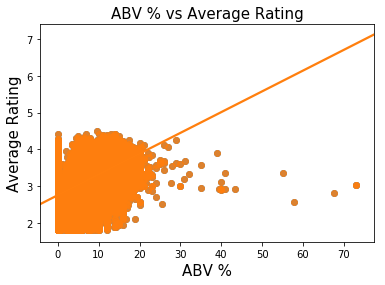

In [103]:
#plot ABV and average rating
sns.regplot(x=df.ABV,y=df.AverageRating, ci=False,)
plt.xlabel('ABV %',size=15)
plt.ylabel('Average Rating',size=15)
plt.title('ABV % vs Average Rating',size=15)
plt.show()

There seems to be a very strong correlation between the ABV and Average rating. However, this includes the 0 values and the very high ABV values that can be considered outliers. We will plot a boxplot to get a sense of the outliers.

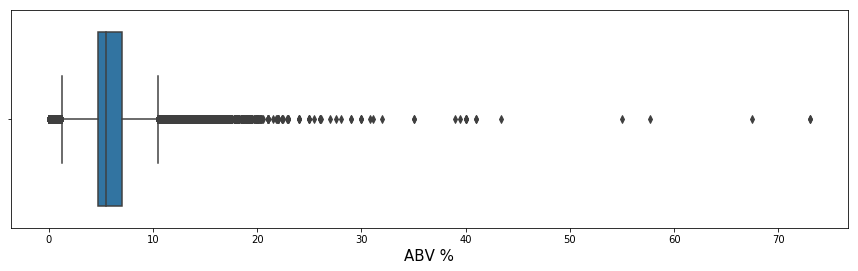

In [104]:
plt.figure(figsize=(15,4))
sns.boxplot(y=df.ABV,orient='h')
plt.xlabel('ABV %', size=15)
plt.show()

We can consider any value above 10% ABV and less than 2% as outliers. We will remove the outliers and plot the correlation again.

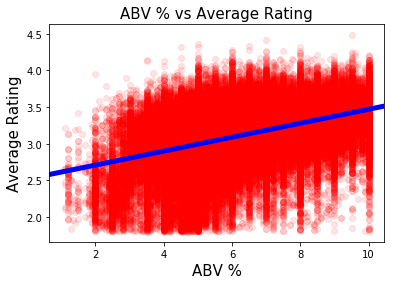

In [105]:
df1 = df[(df['ABV'] > 1) & (df['ABV'] <= 10)]
sns.regplot(x=df1.ABV,y=df1.AverageRating, ci=False,scatter_kws={"color":"red","alpha":0.1},line_kws={"color":"b","alpha":1.0,"lw":5})
plt.xlabel('ABV %',size=15)
plt.ylabel('Average Rating',size=15)
plt.title('ABV % vs Average Rating',size=15)
plt.show()

There is a strong positive correlation between the ABV % and Average Rating. We can calculate a correlation coefficient to understand the correlation better. We will need to look at the distribution for the ABV and Average Rating. We will look at these without the outliers. 

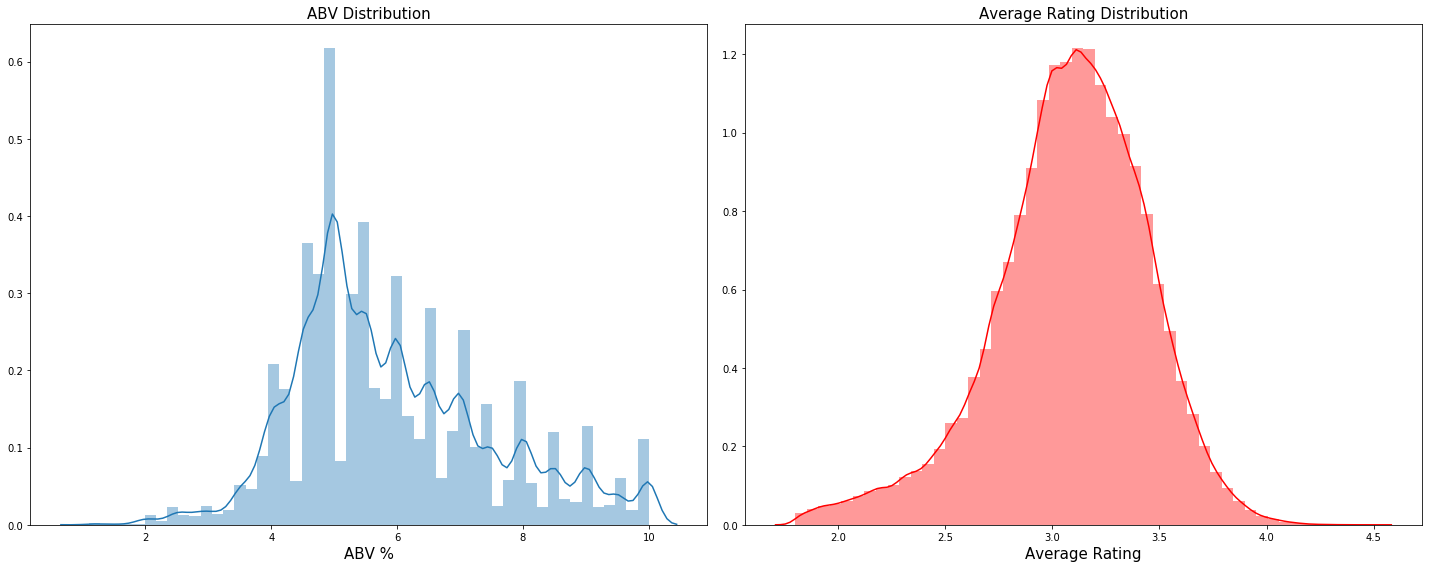

In [106]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df1.ABV)
plt.xlabel('ABV %',size=15)
plt.title('ABV Distribution',size=15)

plt.subplot(1,2,2)
sns.distplot(df1.AverageRating, color='r')
plt.xlabel('Average Rating',size=15)
plt.title('Average Rating Distribution',size=15)

plt.tight_layout()
plt.show()

The ABV % does not look normally distributed. The average rating is clearly normally distributed. Let's test the distributions.

In [107]:
from scipy import stats
stats.normaltest(df1.ABV)

NormaltestResult(statistic=10142.138374385369, pvalue=0.0)

In [108]:
stats.normaltest(df1.AverageRating)

NormaltestResult(statistic=10267.363727749587, pvalue=0.0)

The test confirms that the ABV % is not normally distributed. However, the p-value for the Average Rating also is 0, which means we have to reject the null hypothesis that distribution is normal. This is surprising given that the distribution looks normal visually. We can calculate a spearman correlation coefficient for the data.

In [109]:
stats.spearmanr(df1.ABV,df1.AverageRating)

SpearmanrResult(correlation=0.4241677227393798, pvalue=0.0)

The p-value is 0. Hence we can reject the null hypothesis that there is no correlation. However, the correlation coefficient is somewhat low. Since there is some correlation and no other direct methods available, we can stick to the strategy of filling the ABV values according to the average rating bins. We wil replace all values below a 1% alcohol level.

We will calculate the means (without outliers) for the different bins and then loop through the dataframe to replace the values accordingly.

In [110]:
meanAbv_4 = df1[df1['AverageRating'] >= 4].ABV.mean()
meanAbv_3 = df1[(df1['AverageRating'] >= 3) & (df1['AverageRating'] < 4) ].ABV.mean()
meanAbv_2 = df1[(df1['AverageRating'] >= 2) & (df1['AverageRating'] < 3) ].ABV.mean()
meanAbv_1 = df1[(df1['AverageRating'] >= 1) & (df1['AverageRating'] < 2) ].ABV.mean()
mean_Abv_0 = df1[df1['AverageRating'] < 1].ABV.mean()

In [111]:
#create a temp dataframe for replacing zero values in ABV
df_temp = df

In [112]:
for i in range(len(df_temp.ABV)) :
               if df_temp.iloc[i].ABV < 1:
                   if df_temp.iloc[i].AverageRating >= 4:
                       df_temp.iloc[i,1] = meanAbv_4
                   elif (df_temp.iloc[i].AverageRating >= 3) & (df_temp.iloc[i].AverageRating < 4):
                       df_temp.iloc[i,1] = meanAbv_3
                   elif (df_temp.iloc[i].AverageRating >= 2) & (df_temp.iloc[i].AverageRating < 3):
                       df_temp.iloc[i,1] = meanAbv_2
                   elif (df_temp.iloc[i].AverageRating >= 1) & (df_temp.iloc[i].AverageRating < 2):
                       df_temp.iloc[i,1] = meanAbv_1
                   else:
                       df_temp.iloc[i,1] = mean_Abv_0
                    

Let's check if there are any more zero values in the ABV column and if the values have been replaced.

In [113]:
df_temp.describe()

,ABV,StyleScore,OverallScore,AverageRating,RatingCount
count,220000.000000,130759.000000,130759.000000,220000.000000,220000.000000
mean,6.249801,52.691640,54.141304,3.090490,35.734341
std,2.148592,30.802735,30.645764,0.372849,127.098904
min,1.000000,0.000000,0.000000,1.800000,0.000000
25%,5.000000,29.367154,31.690527,2.878205,5.000000
50%,5.700000,49.417950,51.617950,3.112463,10.000000
75%,7.000000,81.792747,83.094671,3.340448,25.000000
max,73.000000,100.000000,100.000000,4.489771,5182.000000


In [114]:
df_temp.head()

,Name,ABV,StyleScore,OverallScore,AverageRating,RatingCount,BeerStyle,BreweryType,State,Country,Twitter,Facebook
0,Närke Kaggen Stormaktsporter,9.500000,100.0,100.0,4.489771,557,Imperial Stout,Microbrewery,NaN,Sweden,NaN,NaN
1,Westvleteren 12 (XII),10.200000,100.0,100.0,4.426578,3332,Abt/Quadrupel,Microbrewery,NaN,Belgium,NaN,NaN
2,Schramm’s The Heart of Darkness,14.000000,100.0,100.0,4.423655,77,Mead,Meadery,Michigan,United States,schrammsmead,https://facebook.com/SchrammsMeadery
3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,100.0,100.0,4.421873,50,Mead,Meadery,Michigan,United States,bnektar,https://facebook.com/b.nektar
4,Cigar City Pilot Series Dragonfruit Passion Fr...,7.608336,100.0,100.0,4.420719,46,Berliner Weisse,Microbrewery,Florida,United States,cigarcitybeer,https://facebook.com/cigarcitybeer


Looks like all the zero values in the ABV column have been replaced. We previously saw that the 5th observation (index 4) had an ABV of zero. Now, we see that it has a value of 7.6, which was the average ABV for all beers with a rating 4 or higher.

### Rating Count

Now,we will take a look at the rating count column. This is the number of ratings/reviews a beer has recieved on the website. As mentioned earlier, the rating count cannot be zero. We will assume that the missing values are coded as zero. 

In [115]:
len(df_temp[df_temp.RatingCount == 0])

33

There are only 33 observation with zero ratings. It will be safe to assume a mean value for the rating count for the missing values.

In [116]:
df['RatingCount'].describe()

count    220000.000000
mean         35.734341
std         127.098904
min           0.000000
25%           5.000000
50%          10.000000
75%          25.000000
max        5182.000000
Name: RatingCount, dtype: float64

In [117]:
import numpy as np
df_temp['RatingCount'] = np.where(df['RatingCount'] == 0, 35.73,df_temp['RatingCount'])

In [118]:
len(df_temp[df_temp.RatingCount == 0])

0

We have successfully replaced the missing values in the rating count column.

### Social Media

We will be using the facebook and twitter columns to analyze the influence of social media on the rating counts and average rating. We will asumme that the missing values indicate that the beer/brewery does not have a social media account. We will create the following binary columns - has_twitter and has_facebook for analysis.

In [119]:
df_temp.Twitter.isnull().sum()

110147

In [120]:
df_temp.Facebook.isnull().sum()

60080

There are quite a few beers with either social media accounts - 109,853 beers have twitter, 159,220 have facebook. Looks like brewries prefer facbook over twitter. This can be an interesting analysis to see which social media account has a greater influence on the average rating. Let's create the binary columns mentioned above.

In [121]:
df_temp['has_twitter'] = np.where(pd.isnull(df_temp['Twitter']), 0, 1)

In [122]:
df_temp['has_facebook'] = np.where(pd.isnull(df_temp['Facebook']), 0, 1)

Lets quickly check the number of beers with twitter and facebook.

In [123]:
df_temp.has_facebook.sum()

159920

In [124]:
df_temp.has_twitter.sum()

109853

In [125]:
df_temp.head()

,Name,ABV,StyleScore,OverallScore,AverageRating,RatingCount,BeerStyle,BreweryType,State,Country,Twitter,Facebook,has_twitter,has_facebook
0,Närke Kaggen Stormaktsporter,9.500000,100.0,100.0,4.489771,557.0,Imperial Stout,Microbrewery,NaN,Sweden,NaN,NaN,0,0
1,Westvleteren 12 (XII),10.200000,100.0,100.0,4.426578,3332.0,Abt/Quadrupel,Microbrewery,NaN,Belgium,NaN,NaN,0,0
2,Schramm’s The Heart of Darkness,14.000000,100.0,100.0,4.423655,77.0,Mead,Meadery,Michigan,United States,schrammsmead,https://facebook.com/SchrammsMeadery,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,100.0,100.0,4.421873,50.0,Mead,Meadery,Michigan,United States,bnektar,https://facebook.com/b.nektar,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,7.608336,100.0,100.0,4.420719,46.0,Berliner Weisse,Microbrewery,Florida,United States,cigarcitybeer,https://facebook.com/cigarcitybeer,1,1


Now that we have the binary columns we can drop the twitter and facebook columns. 

In [126]:
df_temp.drop(['Twitter','Facebook'],axis=1,inplace=True)

In [127]:
df_temp.head()

,Name,ABV,StyleScore,OverallScore,AverageRating,RatingCount,BeerStyle,BreweryType,State,Country,has_twitter,has_facebook
0,Närke Kaggen Stormaktsporter,9.500000,100.0,100.0,4.489771,557.0,Imperial Stout,Microbrewery,NaN,Sweden,0,0
1,Westvleteren 12 (XII),10.200000,100.0,100.0,4.426578,3332.0,Abt/Quadrupel,Microbrewery,NaN,Belgium,0,0
2,Schramm’s The Heart of Darkness,14.000000,100.0,100.0,4.423655,77.0,Mead,Meadery,Michigan,United States,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,100.0,100.0,4.421873,50.0,Mead,Meadery,Michigan,United States,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,7.608336,100.0,100.0,4.420719,46.0,Berliner Weisse,Microbrewery,Florida,United States,1,1


It is all looking good now. We will do one more check for the columns with numerical values.

In [128]:
df_temp.describe()

,ABV,StyleScore,OverallScore,AverageRating,RatingCount,has_twitter,has_facebook
count,220000.000000,130759.000000,130759.000000,220000.000000,220000.00000,220000.000000,220000.000000
mean,6.249801,52.691640,54.141304,3.090490,35.73970,0.499332,0.726909
std,2.148592,30.802735,30.645764,0.372849,127.09815,0.500001,0.445548
min,1.000000,0.000000,0.000000,1.800000,1.00000,0.000000,0.000000
25%,5.000000,29.367154,31.690527,2.878205,5.00000,0.000000,0.000000
50%,5.700000,49.417950,51.617950,3.112463,10.00000,0.000000,1.000000
75%,7.000000,81.792747,83.094671,3.340448,25.00000,1.000000,1.000000
max,73.000000,100.000000,100.000000,4.489771,5182.00000,1.000000,1.000000


We see there are no missing values in the dataset except for the OverallScore and StyleScore. We have disucssed these missing values above. There are no zero values in the ABV and rating count columns. 

### Missing Values in the other columns

We will look at the missing values in the State, Country, BreweryType and BeerStyle columns.

In [129]:
df_temp.BeerStyle.isnull().sum()

0

In [130]:
df_temp.BreweryType.isnull().sum()

0

In [131]:
df_temp['Country'] = df_temp['Country'].str.strip()
df_temp.Country.isnull().sum()

0

In [132]:
df_temp['State'] = df_temp['State'].str.strip()
df_temp.State.isnull().sum()

81306

There are 81,306 missing values in the state column. We are not interested in comparing the beers from different states around the world. We will evaluate the varations across the countries. However, it will be good to compare beers across states within the US. Let us check if there are states missing for beers from the US

In [133]:
df_temp[df_temp['Country'] == 'United States'].State.isnull().sum()

54

In [134]:
df_temp[df_temp['Country'] == 'United States'].Country.count()

88228

There are 54 missing values out of the 88,228 observations. Since we will not focus too much on the dependency of the state beer ratings we will not worry about the missing values in the state column for now. The entire column will be dropped for the machine learning analysis.

The dataframe can be saved as a .csv file now for further analysis.

In [135]:
df_temp.to_csv('Allbeers.csv',sep=',',encoding='utf-8')